In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import datetime

In [2]:
df_final=pd.read_csv(r'C:\Users\nkn05\OneDrive\Desktop\DL_proj\.venv\Data\df_final.csv')

In [3]:
df_final.head()

,customer_id,total_orders,days_since_last_order,average_order_value,completed_orders,canceled_orders,address_status_changed,shipping_method_preference,churn
0,2,1,1041,4.360,0,0,False,International,1
1,4,1,393,26.760,1,0,False,International,1
2,5,2,760,260.640,6,0,True,Express,1
3,6,4,397,134.824,8,0,False,Priority,1
4,7,1,544,125.360,2,0,False,Standard,1


Encode Categorical Variables:

In [4]:
# One-hot encode categorical features
one_hot_shipping=OneHotEncoder()
shipping_encoder=one_hot_shipping.fit_transform(df_final[['shipping_method_preference']]).toarray()

In [5]:
one_hot_shipping.get_feature_names_out(['shipping_method_preference'])

array(['shipping_method_preference_Express',
       'shipping_method_preference_International',
       'shipping_method_preference_Priority',
       'shipping_method_preference_Standard'], dtype=object)

In [6]:
shipping_encoded_df=pd.DataFrame(shipping_encoder,columns=one_hot_shipping.get_feature_names_out(['shipping_method_preference']))
shipping_encoded_df

,shipping_method_preference_Express,shipping_method_preference_International,shipping_method_preference_Priority,shipping_method_preference_Standard
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
1681,1.0,0.0,0.0,0.0
1682,0.0,0.0,1.0,0.0
1683,0.0,1.0,0.0,0.0
1684,1.0,0.0,0.0,0.0


In [7]:
#combine all the columns with data
df_final=pd.concat([df_final.drop('shipping_method_preference',axis=1),shipping_encoded_df],axis=1)
df_final.head()

,customer_id,total_orders,days_since_last_order,average_order_value,completed_orders,canceled_orders,address_status_changed,churn,shipping_method_preference_Express,shipping_method_preference_International,shipping_method_preference_Priority,shipping_method_preference_Standard
0,2,1,1041,4.360,0,0,False,1,0.0,1.0,0.0,0.0
1,4,1,393,26.760,1,0,False,1,0.0,1.0,0.0,0.0
2,5,2,760,260.640,6,0,True,1,1.0,0.0,0.0,0.0
3,6,4,397,134.824,8,0,False,1,0.0,0.0,1.0,0.0
4,7,1,544,125.360,2,0,False,1,0.0,0.0,0.0,1.0


In [8]:


#df_final = pd.get_dummies(df_final, columns=['shipping_method_preference'], drop_first=True)

In [9]:
#df_final

Normalize/Scale Numerical Features:

In [10]:
#save the encoder and scaler
import pickle

with open('one_hot_shipping.pkl','wb') as file:
    pickle.dump(one_hot_shipping,file)


In [11]:

# Initialize the scaler
scaler = StandardScaler()

# Scale numerical features
numerical_features = ['total_orders', 'days_since_last_order', 'average_order_value', 'completed_orders', 'canceled_orders']
df_final[numerical_features] = scaler.fit_transform(df_final[numerical_features])

Separate Features and Target:

In [12]:
## DiVide the dataset into indepent and dependent features
X = df_final.drop(columns=['churn', 'customer_id'])  # Features
y = df_final['churn']  # Target

## Split the data in training and tetsing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Scale these features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [13]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [14]:
X

,total_orders,days_since_last_order,average_order_value,completed_orders,canceled_orders,address_status_changed,shipping_method_preference_Express,shipping_method_preference_International,shipping_method_preference_Priority,shipping_method_preference_Standard
0,-0.979188,2.481218,-1.444146,-0.731086,-0.342644,False,0.0,1.0,0.0,0.0
1,-0.979188,0.262510,-1.180201,-0.647897,-0.342644,False,0.0,1.0,0.0,0.0
2,-0.697462,1.519093,1.575671,-0.231952,-0.342644,True,1.0,0.0,0.0,0.0
3,-0.134012,0.276205,0.093147,-0.065574,-0.342644,False,0.0,0.0,1.0,0.0
4,-0.979188,0.779523,-0.018370,-0.564708,-0.342644,False,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1681,1.274615,-0.329831,-0.181553,0.267182,-0.342644,False,1.0,0.0,0.0,0.0
1682,-0.979188,-0.483908,0.485954,-0.398330,-0.342644,True,0.0,0.0,1.0,0.0
1683,-0.697462,-1.011193,-0.200657,-0.398330,-0.342644,False,0.0,1.0,0.0,0.0
1684,-0.979188,0.057074,-0.784283,-0.647897,-0.342644,False,1.0,0.0,0.0,0.0


In [15]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print(y_train.value_counts()) 

churn
1    981
0    367
Name: count, dtype: int64


# Building ANN model

Define the ANN Architecture:

Input layer: Number of neurons = Number of features.

Hidden layers: Experiment with 1-3 hidden layers.

Output layer: 1 neuron (for binary classification) with a sigmoid activation function.

In [17]:
# Initialize the model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))  # Dropout for regularization

# Second hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1, activation='sigmoid'))

c:\Users\nkn05\OneDrive\Desktop\DL_proj\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

Compile the Model:

Use binary_crossentropy as the loss function (for binary classification).

Use adam as the optimizer.

Track accuracy as the evaluation metric

In [19]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.0005)

In [20]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [85]:
# Set up the Tensorboard
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [22]:
## Set up Early Stopping
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)


In [23]:
### Train the model
history=model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7264 - loss: 0.6062 - val_accuracy: 0.7633 - val_loss: 0.5037
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7494 - loss: 0.4986 - val_accuracy: 0.8077 - val_loss: 0.4280
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7895 - loss: 0.4403 - val_accuracy: 0.8314 - val_loss: 0.3802
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8085 - loss: 0.4052 - val_accuracy: 0.8609 - val_loss: 0.3474
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8344 - loss: 0.3656 - val_accuracy: 0.8728 - val_loss: 0.3200
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8480 - loss: 0.3315 - val_accuracy: 0.8787 - val_loss: 0.2962
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8633 - loss: 0.3209 - val_accuracy: 0.8964 - val_loss: 0.2769
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8811 - loss: 0.2967 - val_accuracy: 0.9

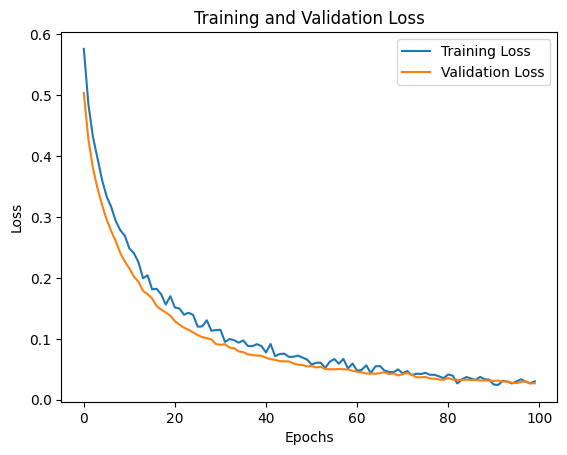

In [24]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
model.save('model.h5')

In [26]:
## Load Tensorboard Extension
%load_ext tensorboard

In [84]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 18896), started 4:10:58 ago. (Use '!kill 18896' to kill it.)

# improve the ANN model

In [63]:
from tensorflow.keras.regularizers import l2

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


c:\Users\nkn05\OneDrive\Desktop\DL_proj\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [70]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [71]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

Smote to handle imbalanced datset

In [72]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:", Counter(y_train_resampled))



Class distribution after SMOTE: Counter({1: 981, 0: 981})


In [73]:
## Set up Early Stopping
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)




In [74]:
history = model.fit(
    X_train_resampled, y_train_resampled,
    epochs=50,  # Number of epochs
    batch_size=32,  # Batch size
    validation_data=(X_test, y_test),  # Validation data
    verbose=1 ,# Show progress,
    callbacks=[early_stopping_callback]
) 

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7481 - loss: 1.4357 - val_accuracy: 0.8432 - val_loss: 0.8727
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8754 - loss: 0.7810 - val_accuracy: 0.8935 - val_loss: 0.5503
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9079 - loss: 0.5021 - val_accuracy: 0.9112 - val_loss: 0.3914
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9443 - loss: 0.3662 - val_accuracy: 0.9231 - val_loss: 0.3198
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9447 - loss: 0.3055 - val_accuracy: 0.9497 - val_loss: 0.2718
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9570 - loss: 0.2635 - val_accuracy: 0.9675 - val_loss: 0.2348
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9621 - loss: 0.2408 - val_accuracy: 0.9793 - val_loss: 0.2160
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9745 - loss: 0.2339 - val_accuracy: 0.9675 - val_loss:

plot training and validation loss

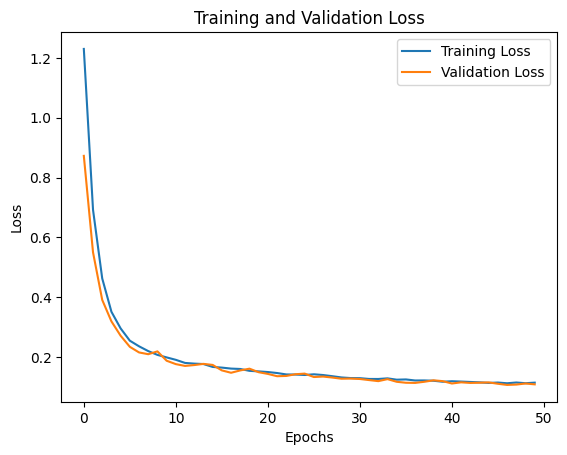

In [75]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plot Training and Validation Accuracy:

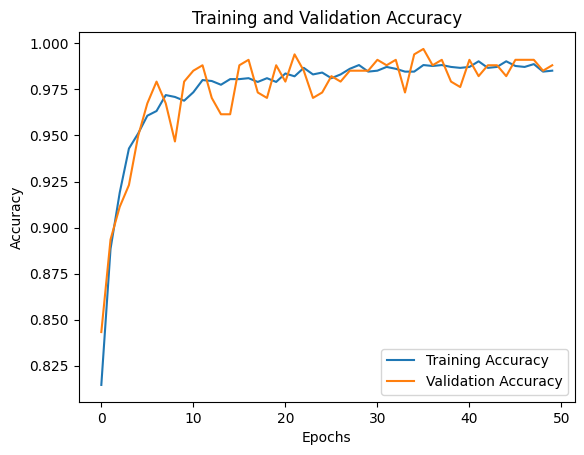

In [76]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

 # Evaluate the ANN Model

Make Predictions:

In [77]:
y_pred_prob = model.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


Calculate Evaluation Metrics:

Accuracy: 0.9911242603550295
Precision: 0.9959839357429718
Recall: 0.992
F1-Score: 0.9939879759519038


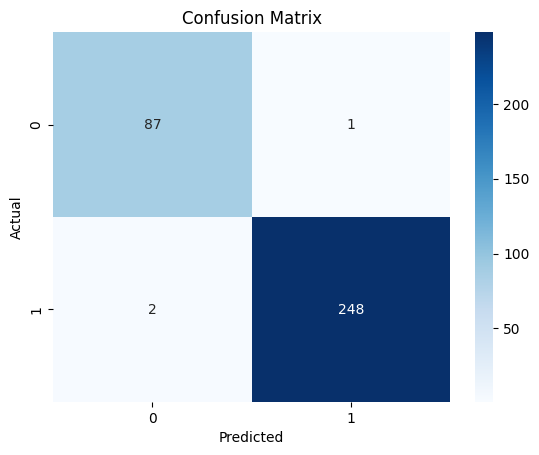

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

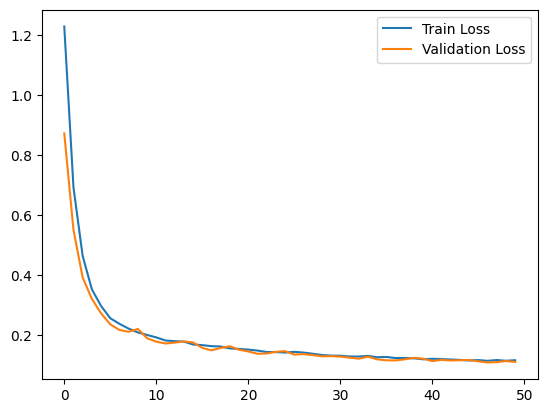

In [79]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [80]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[ 87   1]
 [  2 248]]


Save the improved model

In [83]:
model.save('churn_prediction_ann_model.h5')